# 딥러닝 기초(3)

## 전결합층 역전파

### 역전파 수식
- 역전파를 이용해 각 파라미터의 기울기를 구한다.
- 우선 순전파 식부터 시작한다.

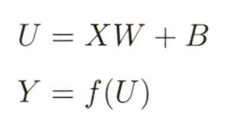

- 다음 수식과 같이 $U$의 각 원소에 주목해본다.

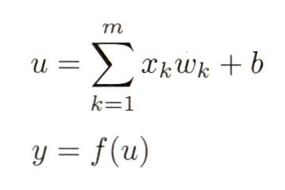

- 층 내부의 개별 뉴런을 식별하는 첨자와 배치 내의 샘플을 식별하는 첨자는 생략되었다.
- 가중치 기울기, 즉 오차의 가중치를 이용한 편미분을 생각해본다.

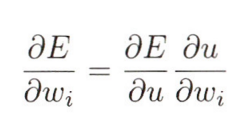

- $w_i$는 가중치로, 1 ≤ $i$ ≤ $m$ 이다.
- 이 식에서 우변의 $∂ E\over∂ u$를 다음과 같이 델타로 표현한다.

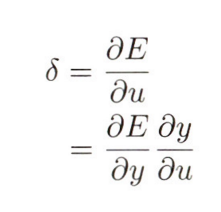

- 델타는 연쇄 법칙을 이용해 $∂ E\over∂ y$와 $∂ y\over∂ u$로 분해할 수 있다.
- $∂ E\over∂y$는 출력층의 경우에는 오차함수의 $y$를 이용해 편미분으로 구할 수 있고 은닉층에서는 뒤 층에서 역전파시켜 구할 수 있다. 
- 또한 $∂ y\over∂u$는 활성화 함수를 편미분해 구한다.
- $∂y\over∂u$는 활성화 함수를 편미분해 구한다.

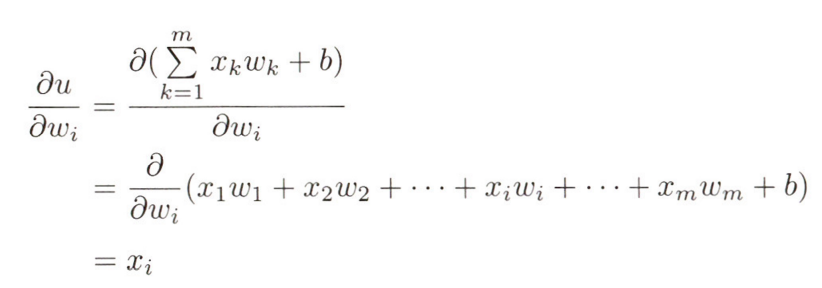

- 가중치의 기울기를 다음 식과 같이 표현할 수 있다.

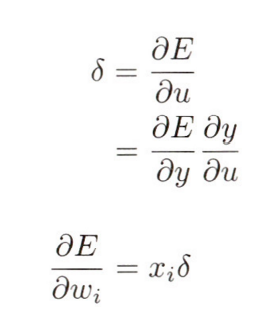

- 편향의 기울기는 $u$를 $b$로 편미분하면 1이 되므로 이후에도 위와 동일한 방식으로 다음과 같이 구한다.

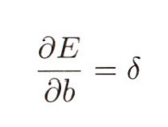

- 입력 $x_i$의 기울기를 구한다.
- $x_i$는 층 내의 모든 뉴런에 영향을 주므로, 연쇄 법칙을 층 내 모든 뉴련으로 확장시킬 필요가 있다.
- 뉴런의 수가 $n$일 때, 입력 기울기는 다음과 같이 구한다.

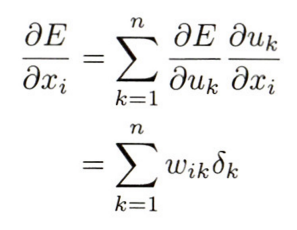

- 첨자 $k$는 층 내의 각 뉴런을 나타낸다.
- 입력 기울기는 하나 앞 층의 출력 기울기와 마찬가지로 여기에서 δ를 구하기 위해 사용된다.

### 역전파를 행렬로 표현
- 원소별로 역전파 수식을 행렬로 확장한다.

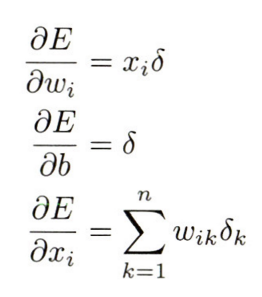

- 가중치 기울기를 행렬로 표시한다.
- 가중치 기울기는 배치마다 계산해야 한다.
- 배치 전체의 오차를 $E$라고 하면 가중치 기울기는 다음 식과 같이 구할 수 있다.

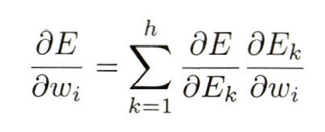

- $h$는 배치사이즈, $E_k$는 샘플마다의 오차
- 개별 샘플의 오차 총합은 배치의 오차

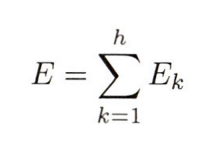

- $∂E\over∂E_k$ = 1 이므로, 하나의 배치에서 가중치의 기울기는 다음과 같다.

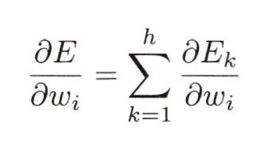

- 한 배치의 기울기는 각 샘플의 기울기 총합으로 구할 수 있다.
- 행렬 연산을 이용하면 한 번에 계산할 수 있다.
- 행렬 $X$를 전치한 것과 δ행렬을 의미하는 Δ와의 곱을 이용해 배치 내의 총합을 구할 수 있다.
- 여기서 Δ는 미세한 변화를 뜻하는 Δ와는 다른 의미이므로 주의!

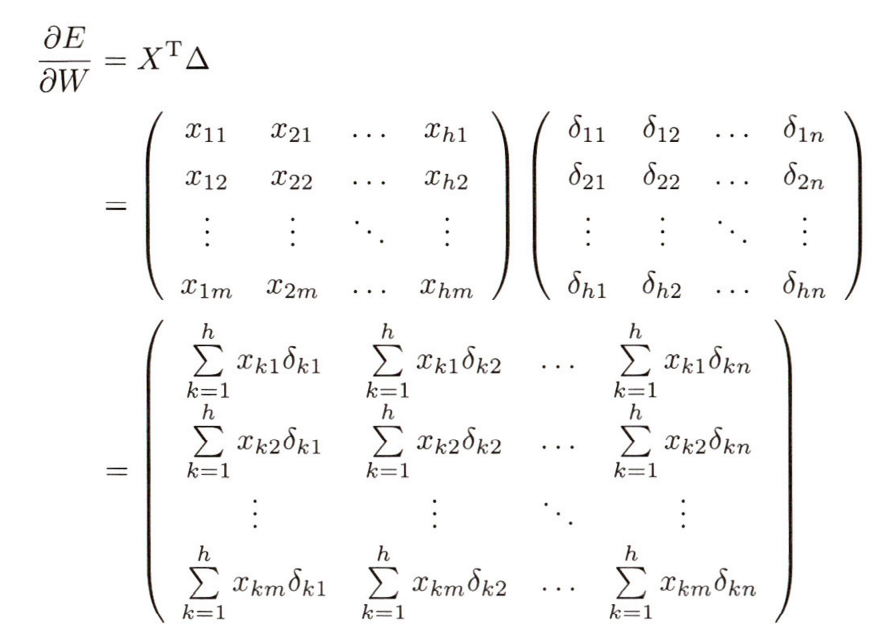

- 행렬 $∂E\over∂W$의 각 원소는 개별 샘플의 기울기 총합이 된다.
- 편향의 기울기도 개별 샘플의 기울기 총합을 이용해 구할 수 있다.
- 편향의 기울기는 배치 내에서 모두 같은 값을 갖기 때문에 다음과 같이 가로형 벡터를 세로 방향으로 연장시켜 행렬로 표현할 수 있다.

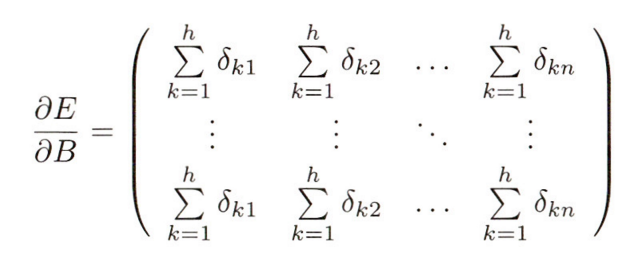

- 마지막으로 입력 기울기를 구한다.
- 입력기울기는 배치 내에서 총합을 구할 필요가 없다.
- 그 대신 개별 샘플, 개별 입력마다 가중치와 델타의 곱의 총합을 계산한다.
- 이 값은 Δ와 $W^T$의 행렬 곱으로 구할 수 있다.

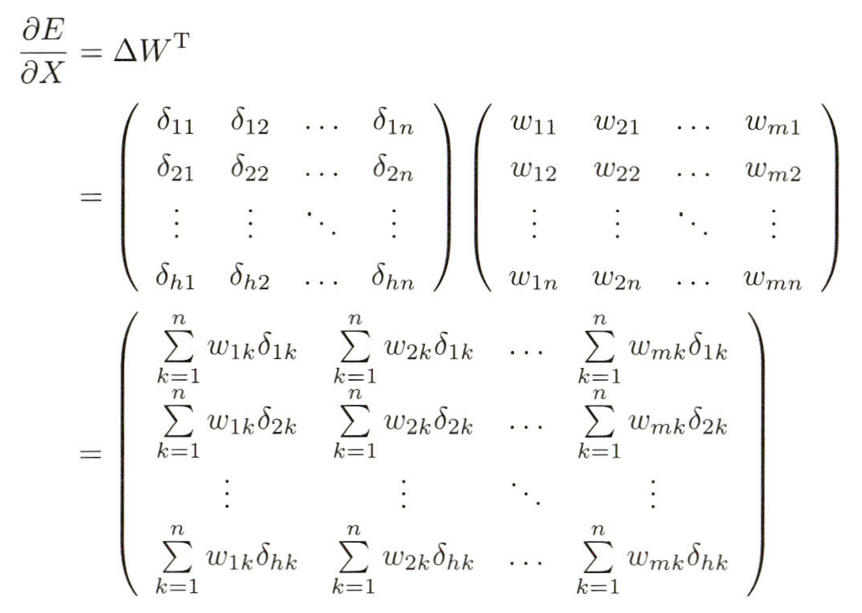

- 각 원소는 층 내의 뉴런에서 총합을 구한 것과 같다.
- 이 입력 기울기를 표현하는 행렬이 앞 층으로 전파된다.
- 원소를 행렬로 확장해서 역전파 과정에서의 여러 뉴런이나 배치에 적용할 수 있다.

### 역전파를 코드로 구현
- 각 기울기를 구하는 공식을 코드로 구현해본다.

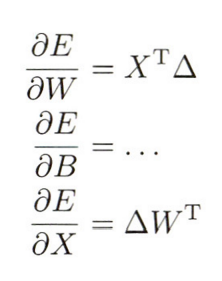

- $∂E\over∂B$의 우변항은 앞에서 표기한 대로이다.
- 넘파이의 dot함수와 sum함수를 사용해 간단한 코드로 구현할 수 있다.

In [ ]:
# x: 입력 행렬 w: 가중치 행렬 delta: δ행렬
grad_w = np.dot(x.T, delta)         # w의 기울기
grad_b = np.sum(delta, axis=0)      # b의 기울기
grad_x = np.dot(delta, w.T)         # x의 기울기

- 편향 기울기는 axis=0, 즉 세로 방향(배치 내)으로 총합을 구할 수 있다.
- grad_b 행 수는 1이 되며 필요에 따라 브로드캐스팅을 이용해 더 늘릴 수 있다.